# Part 3: Classes

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Python.svg/800px-Python.svg.png" alt="drawing" width="250"/>


## 3. 1 Classes

Until now, we have used many of Python's built-in types: integers, booleans, lists, dictionaries... Like functions, we can also defined our own classes. Thayt's important because Python is an *object-oriented programming* (OOP), that means that it organizes code and data with user-defined types.

Classes are based on two main concepts:

- Attributes: Class attributes are class variables that are inherited by every object of a class. The value of class attributes remain the same for every new object. Similar to variables defined inside functions, but attributes can be called outside the class. 
- Methods: Methods are functions that are associated with a particular class. Think for example in `list.append()`.


### 3.1.1 Define new class

To define a new class whe need to use the keyword *class* followed by the name of the class. Then we can start adding attributes and methods. Inside the class statement we will can define attributes like we define variables (with *=* statement) and methods like we define functions (*def* statement). That means that it is **mutable**.

For methods, we can use ***self*** argument to indicate that the method takes the object itself as parameter. Then, inside the method we can call the attributes by using `self.attribute_name`

In [13]:
class Rectangle:
    #Represents a 4x5 rectangle
    length = 4
    width = 5
    
    def compute_area(self):
        return self.length * self.width
        

r = Rectangle()
print(r)
area = r.compute_area()
print(area)

20


In [16]:
r = Rectangle()

In [14]:
# We can modify object's attributes by a regular asignment state
r.length = 10
area = r.compute_area()
print(area)

50


In [3]:
#We can also add new attributes
r.new_attribute = 1

#or

setattr(r, "new_attribute2", 4)

### 3.1.2 Operator Overloading

Operator overloading is when you change the behaviour of an operator (like `print()` or `+`). Basically, for every operator there is a special method, we're not going to cover all of them, but you can check the complete list [here](https://docs.python.org/3/reference/datamodel.html#specialnames).

#### 3.1.2.1 *init* method

The *init* method (short for "initialization") is a special method that gets invoked when an object is instantiated (created). This method is usually used to assign values to parameters at the moment you create them (instead of assigning them after, like we did before).

It is a common practice for the parameters of *__init__* to have the **same names** as the attributes.

In [20]:
class Rectangle:
    
    def __init__(self, length=4, width=5):
        
        self.length = length
        self.width = width
        
    def compute_area(self):
        return self.length * self.width
    
r = Rectangle(3,3)
print(r)
area = r.compute_area()
print(area)

9


#### 3.1.2.2 *str* method

The *__str__* method is another special method that is supposed to return a string representation of an object. Is specially useful if you want to make your object printable or convertible to string.

In [21]:
str(r)

'<__main__.Rectangle object at 0x00000257DEDC4B48>'

In [26]:
class Rectangle:
    
    def __init__(self, length=4, width=5):
        
        #Length and width of the rectangle in cm
        
        self.length = length
        self.width = width
        
    def compute_area(self):
        return self.length * self.width
    
    def __str__(self):
        return "Rectangle of {}x{} cm".format(self.length, self.width)
    
r = Rectangle(3,3)
print(r)
area = r.compute_area()
print(area)

Rectangle of 3x3 cm
9


#### 3.1.2.3 *add* method

The *__add__* method is another special method that allows to use the `+`.

In [31]:
class Rectangle:
    
    def __init__(self, length=4, width=5):
        
        #Length and width of the rectangle in cm
        
        self.length = length
        self.width = width
        
    def compute_area(self):
        return self.length * self.width
    
    def __str__(self):
        return "Rectangle of {}x{} cm".format(self.length, self.width)
    
    def __add__(self, other):
        #Sum rectangles' perimeters
        rectangle_sum = 2*(self.width + self.length + other.width + other.length)
        
        return rectangle_sum
    

    
r1 = Rectangle(3,3)
r2 = Rectangle(4,1)
r1+r2

22

But what if we also want to use `+` with an *int* variable? Then we would need to edit the function by adding a conditional based on object type (**type-based dispatch**).

To do that we can use the *built-in* function `isinstance(n, t)` which takes a variable (*n*) and a variable type (*t*) and returns True if the variable's type is the specified type, otherwise returns False.

**Note**: An instance is an object that belongs to a class. So when we refern to the creation a new object as **instantiatiation**

In [32]:
r1+5

AttributeError: 'int' object has no attribute 'width'

In [36]:
isinstance(1, int)

True

In [37]:
isinstance(1, float)

False

In [38]:
isinstance(r1, float)

False

In [44]:
isinstance(r1, Rectangle)

True

In [46]:
isinstance(r1, type(r2))

True

In [2]:
class Rectangle:
    
    def __init__(self, length=4, width=5):
        
        #Length and width of the rectangle in cm
        
        self.length = length
        self.width = width
        
    def compute_area(self):
        return self.length * self.width
    
    def __str__(self):
        return "Rectangle of {}x{} cm".format(self.length, self.width)
    
    def __add__(self, other):
        
        if isinstance(other, Rectangle):
            
            #Sum rectangles' perimeters
            rectangle_sum = 2*(self.width + self.length + other.width + other.length)
            
        else:
            rectangle_sum = 2*(self.width + self.length) + other
        
        return rectangle_sum
    

    
r1 = Rectangle(3,3)

In [50]:
r1+5

17

Type-based dispath is useful, but it is not always needed. Often you can avoid it by writing functions that work correctly for arguments with different types.

Until now we've already used (and created) multiple functions that can work with different types. Think, for example in the `len()`*built-in* function, it works for lists, strings, tuples, sets...

Functions that work with several types are called **polymorphic**. Polymotphism can facilitate code reuse. In general, if all the operations inside a function (or method) work with a given type, the function works with that type.

### 3.1.3 Copying

As we mentioned objects are mutable, that means that we have to take care of **aliasing**. A good solution is copying an object, for that we can use `copy` *module*

When a function uses the mutability of the object to transform it without returning anything **intentionally** it's called **modifier**. In general, it's recommended not to use them because it tends to create more errors and increase the development time compared to the **pure functions** (the ones that return something).

In [59]:
r1 = Rectangle(3,3)
r2 = r1

In [60]:
r1 == r2

True

In [61]:
r1.width = 2

In [62]:
print(r1.width)

2


In [63]:
print(r2.width)

2


In [3]:
#but if we copy they are not going to be the same but they are going to be equal
import copy
r1 = Rectangle(3,3)
r2 = copy.copy(r1)

In [4]:
r1 == r2

False

In [5]:
r1.width = 2

In [6]:
print(r1.width)

2


In [7]:
print(r2.width)

3


**WHYYYYYY????????**

What we did with `copy.copy()` function is what is called a **shallow copy** because it copies the object and any references it contains, but not the embedded objects (attributes).

For most of the cases, that's not what we want. If we need to copy everything we need to do a **deep copy**.

In [70]:
r1 = Rectangle(3,3)
r2 = copy.deepcopy(r1)

In [71]:
r1 == r2

False

In [72]:
r1.width = 2
print(r1.width)

2


In [73]:
print(r2.width)

3


## Exercice break
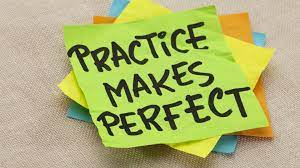

##### Exercice 1: 
- Create a class called `Animal` that has the following attributes: `name`, `specie`, `age`.
- Define a method in the Animal class called `feed()` that prints a message to the console indicating that the animal has been fed.
- Create another class called `Zoo` that has the following attributes: `name`, `location`, and `animals` (a list of Animal objects).
- Define another method in the Zoo class called `feed_animals()` that iterates over the list of animals and calls the feed method for each one.

##### Exercice 2:

- Create a class called `Car` that has the following attributes: `company`, `model`, `year`, and `speed`.
- Define a method in the Car class called `accelerate` that increases the speed of the car by 10.
- Define another method in the Car class called `brake` that decreases the speed of the car by 7.
- Define a method in the Car class called `expected_time` that prints the expected time, in hours and minutes, to reach a certain distance (given as parameter)
- Create several instances of the Car class, set their attributes, and call the accelerate and brake methods to change their speed.
- When you print a `Car` instance you should see the company, the model, how many times it has been accelerated (calls of `accelerate`) and how many times it has been slown down (calls of `brake`)

In [25]:
class Animal:
    
    def __init__(self, name, specie, age):
        
        self.name = name
        self.specie = specie
        self.age = age
        
    def feed(self):
        print("{} has been feed".format(self.name))
        
class Zoo:
    
    def __init__(self, name, location, animals):
        
        self.name = name
        self.location = location
        self.animals = animals
        
        
    def feed_animals(self):
        
        for animal in self.animals:
            animal.feed()
            
a1 = Animal("Copito Nieve", "White Gorilla", 40)
a2 = Animal("Laika", "Dog", 52)

z1 = Zoo("Animal park", "Barcelona", [a1, a2])
z1.feed_animals()

Copito Nieve has been feed
Laika has been feed


In [22]:
class Car:
    
    def __init__(self, company, model, year, speed=0):
        #speed in km/h
        self.company = company
        self.model = model
        self.year = year
        self.speed = speed
        self.accelerated = 0
        self.slown_down = 0
        
    def accelerate(self):
        #accelerates 10km/h
        self.speed += 10
        self.accelerated += 1
        
    def brake(self):
        #reduces speed 10km/h
        self.speed -= 10
        self.slown_down +=1
        
    def expected_time(self, km):
        
        hours = km//self.speed
        minutes = int((km%self.speed)/self.speed*60)
        
        print("The car will take {} hours and {} minutes to complete {}km".format(hours, minutes, km))
        
car = Car("Seat","Ibiza","1998",10)
car.accelerate()
car.accelerate()
car.accelerate()
car.accelerate()
car.accelerate()
car.brake()
car.expected_time(49)

The car will take 0 hours and 58 minutes to complete 49km


##### Exercice 3: The following code writes a definition for a class named *Kangaroo*, but when you test it you find one bug (actually one of the most common, and difficult to find, errors in Python), fix it.

In [8]:
#NO SOLUCIONAT
# If you run this program as is, it seems to work.
# To see the problem, trying printing roo.

class Kangaroo:
    """A Kangaroo is a marsupial."""
    
    def __init__(self, name, contents=[]):
        """Initialize the pouch contents.
        name: string
        contents: initial pouch contents.
        """
        self.name = name
        self.pouch_contents = contents

    def __str__(self):
        """Return a string representaion of this Kangaroo.
        """
        t = [ self.name + ' has pouch contents:' ]
        for obj in self.pouch_contents:
            s = '    ' + object.__str__(obj)
            t.append(s)
        return '\n'.join(t)

    def put_in_pouch(self, item):
        """Adds a new item to the pouch contents.
        item: object to be added
        """
        self.pouch_contents.append(item)


kanga = Kangaroo('Kanga')
roo = Kangaroo('Roo')
kanga.put_in_pouch('wallet')
kanga.put_in_pouch('car keys')
kanga.put_in_pouch(roo)

print(kanga)



Kanga has pouch contents:
    'wallet'
    'car keys'


In [9]:
print(roo)

Roo has pouch contents:
    'wallet'
    'car keys'


In [10]:
class Car:
    
    model = "Toyota Yaris"
    speed = 120
        
    def __str__(self):
        return(" ".join([self.model, self.color]))
        
my_car = Car()

my_car.color = "Blue"
print(my_car)

Toyota Yaris Blue


'Toyota Yaris Blue'